In [514]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw # pip3 install Pillow
import json
import os
import sys
import math
import glob
import cv2 # pip3 install opencv-python

## Load data

### Set file paths and find all `jpg_paths` and `json_paths`

In [517]:
path = '../sample_data/'
jpg_paths = glob.glob(path+'*.jpg')
json_paths = glob.glob(path+'*.json')
print(f"Number of jpg file paths found: {len(data_paths)}\nExample: {data_paths[0]}")
print(f"Number of json file paths found: {len(data_paths)}\nExample: {data_paths[0]}")

Number of jpg file paths found: 191
Example: ../sample_data/2020-03-14+22-23-03+N0U101-Seite+Links+Unten-_00113.jpg
Number of json file paths found: 191
Example: ../sample_data/2020-03-14+22-23-03+N0U101-Seite+Links+Unten-_00113.jpg


### Load .jpg images as `image_data`

In [519]:
# image_data = np.array([np.array(Image.open(fname)) for fname in jpg_paths])

### Load .json labels as `json_labels`

In [520]:
# json_labels = 
for fname in json_paths:
    print(fname)

../sample_data/2020-03-19+15-49-40+NAB5550-Front+Nah+Links-_00024.json
../sample_data/2020-02-28+14-00-42+N2FU9-Front+Nah+Links-_00025.json
../sample_data/2020-03-14+22-23-03+N0U101-Seite+Links+Unten-_00112.json
../sample_data/2020-02-21+09-06-12+N061340-Heck+Weit+Links-_00045.json
../sample_data/2020-03-19+15-49-40+NAB5550-Seite+Links+Unten-_00110.json
../sample_data/2020-03-10+16-27-14+N0M51-Front+Nah+Links-_00025.json
../sample_data/2020-04-20+11-49-49+N05005-Heck+Weit+Rechts-_00040.json
../sample_data/2020-04-15+14-09-51+N0X758-Front+Nah+Rechts-_00020.json
../sample_data/2020-03-11+15-04-20+NAB972-Seite+Rechts+Unten-_00061.json
../sample_data/2020-04-15+14-09-51+N0X758-Seite+Rechts+Unten-_00050.json
../sample_data/2020-02-24+16-27-20+NAG551-Seite+Rechts+Unten-_00061.json
../sample_data/2020-03-19+15-49-40+NAB5550-Seite+Rechts+Unten-_00058.json
../sample_data/2020-04-15+14-09-51+N0X758-Seite+Rechts+Mitte-_00075.json
../sample_data/2020-02-28+14-00-42+N2FU9-Seite+Links+Mitte-_00131.j

### Function shows numpy array as image

In [76]:
def show(array, size='small'):
    if size == 'small':
        plt.rcParams["figure.figsize"] = (10,5)
    if size == 'medium':
        plt.rcParams["figure.figsize"] = (14,7)
    if size == 'large':
        plt.rcParams["figure.figsize"] = (20,10)
    print(f"Array shape: {array.shape}")
    plt.imshow(array, interpolation='antialiased')
    plt.show()

Array shape: (10, 40)


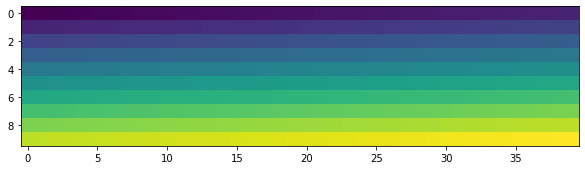

In [324]:
G=F.reshape((40,40))
show(G[0:10])

Chunk Views
Squares Across:5 - Stridable Width:32 - Stride Across:8
Squares Down:10 - Stridable Height:36 - Stride Down:4
Array shape: (8, 4)


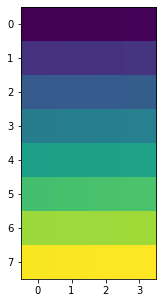

Array shape: (8, 4)


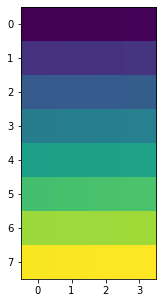

Array shape: (8, 4)


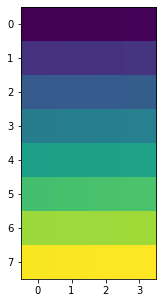

Array shape: (8, 4)


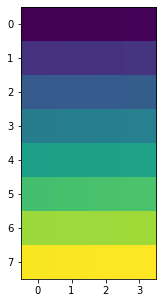

Array shape: (8, 4)


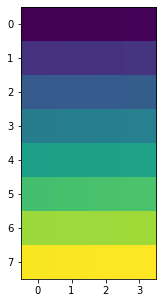

Array shape: (8, 4)


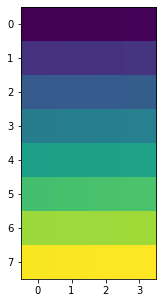

Array shape: (8, 4)


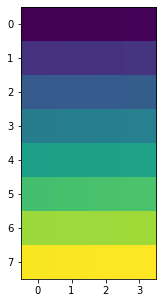

Array shape: (8, 4)


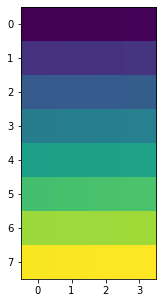

Array shape: (8, 4)


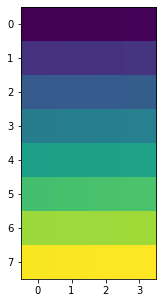

Array shape: (8, 4)


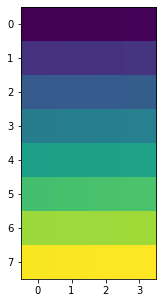

Array shape: (8, 4)


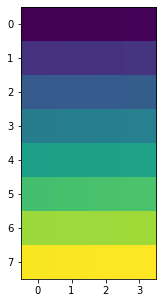

Array shape: (8, 4)


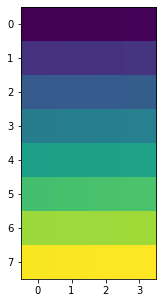

Array shape: (8, 4)


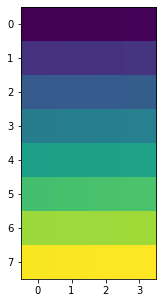

Array shape: (8, 4)


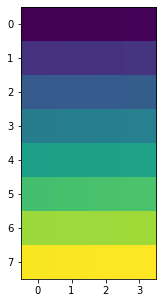

Array shape: (8, 4)


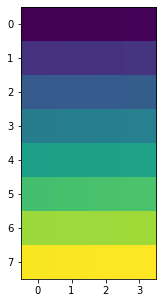

Array shape: (8, 4)


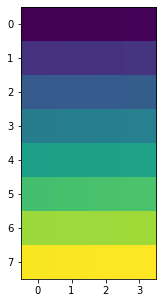

Array shape: (8, 4)


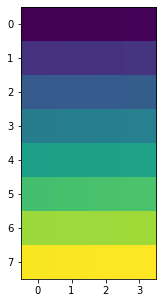

Array shape: (8, 4)


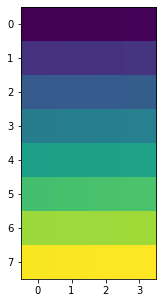

Array shape: (8, 4)


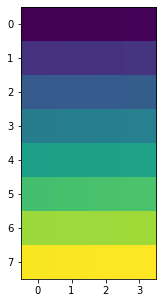

Array shape: (8, 4)


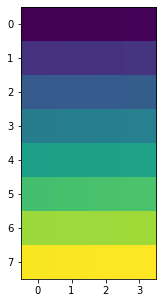

Array shape: (8, 4)


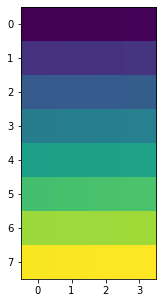

Array shape: (8, 4)


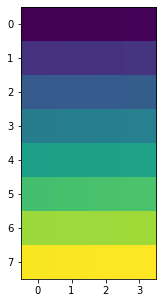

Array shape: (8, 4)


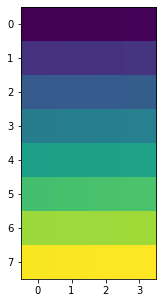

Array shape: (8, 4)


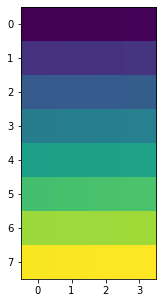

Array shape: (8, 4)


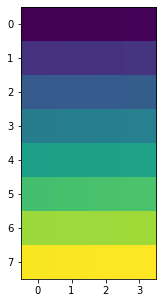

Array shape: (8, 4)


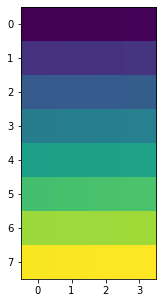

Array shape: (8, 4)


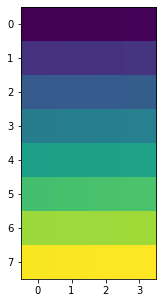

Array shape: (8, 4)


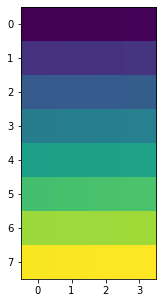

Array shape: (8, 4)


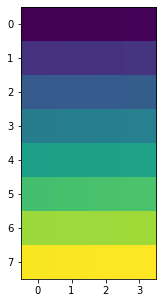

Array shape: (8, 4)


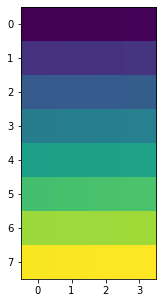

Array shape: (8, 4)


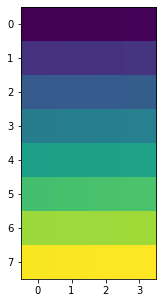

Array shape: (8, 4)


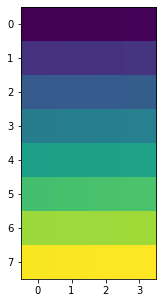

Array shape: (8, 4)


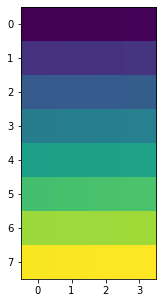

Array shape: (8, 4)


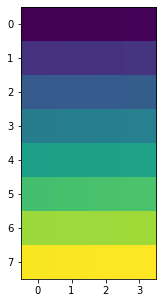

Array shape: (8, 4)


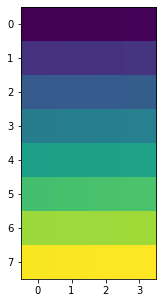

Array shape: (8, 4)


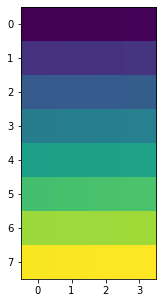

Array shape: (8, 4)


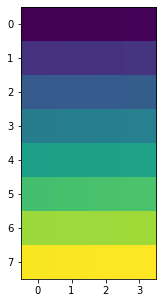

Array shape: (8, 4)


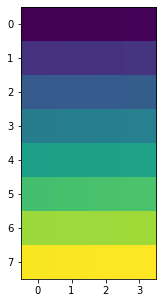

Array shape: (8, 4)


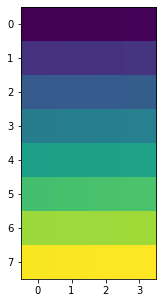

Array shape: (8, 4)


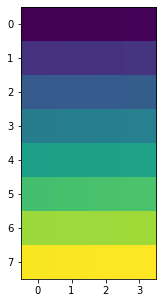

Array shape: (8, 4)


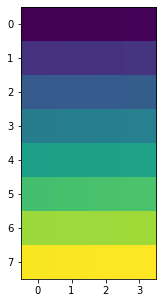

Array shape: (8, 4)


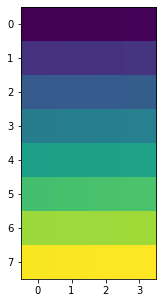

Array shape: (8, 4)


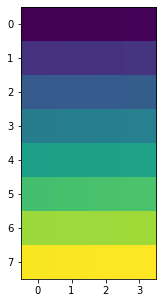

Array shape: (8, 4)


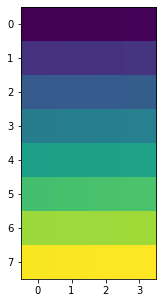

Array shape: (8, 4)


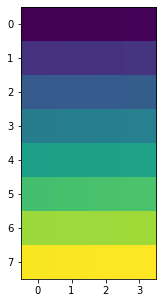

Array shape: (8, 4)


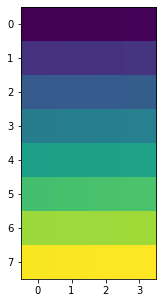

Array shape: (8, 4)


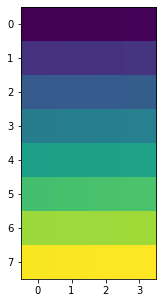

Array shape: (8, 4)


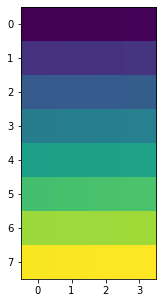

Array shape: (8, 4)


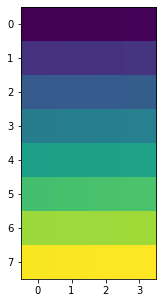

Array shape: (8, 4)


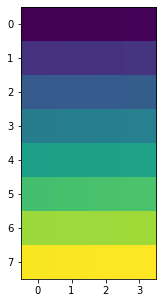

In [374]:
def get_chunk_params(array,chunk_dim):
    height, width = chunk_dim[0], chunk_dim[1]
    # Assuming (height,width) are less than (o_height,o_width)
    o_height = array.shape[0]
    o_width = array.shape[1]
    if height > o_height or width > o_width:
        return "Parameter Val Error: Chunk (height,width) parameters must not exceed array height and width respectively"
    stridable_width, stridable_height = o_width-width, o_height-height
    # Calculate least number of chunks that can cover entire image
    squares_across, squares_down = math.ceil(o_width/width), math.ceil(o_height/height)
    stride_w = int(stridable_width/(squares_across-1)) if squares_across > 1 else 0
    stride_h = int(stridable_height/(squares_down-1)) if squares_down > 1 else 0
    print(f"""Chunk Views
Squares Across:{squares_across} - Stridable Width:{stridable_width} - Stride Across:{stride_w}
Squares Down:{squares_down} - Stridable Height:{stridable_height} - Stride Down:{stride_h}""")
    return [stridable_width, stride_w, stridable_height, stride_h, squares_across, squares_down]

def generate_coordinates(stride_dims):
    stridable_w, stride_w, stridable_h, stride_h, blocks_a, blocks_d = stride_dims
    W_l = np.arange(0, stridable_w+stride_w, stride_w)
    W_r = np.arange(stride_w, stridable_w+stride_w*2, stride_w)
    H_t = np.arange(0, stridable_h+stride_h, stride_h)
    H_b = np.arange(stride_h, stridable_h+stride_h*2, stride_h)
    top_left = np.array(np.meshgrid(W_l,H_t)).T
    bottom_right = np.array(np.meshgrid(W_r,H_b)).T
    blocks = bottom_right.shape[0]*bottom_right.shape[1]
    all_coordinates = np.concatenate((top_left,bottom_right),axis=2).reshape(blocks,2,2)
    return all_coordinates

def get_block(array, coordinates):
    top = coordinates[0][0]
    left = coordinates[0][1]
    bottom = coordinates[1][0]
    right = coordinates[1][1]
    return array[top:bottom,left:right]



block_coordinates = generate_coordinates(get_chunk_params(G,chunk_dim=(4,8)))


for block_coord in block_coordinates:
    show(get_block(G,block_coord))



In [278]:
tl = np.array([[0,0]])
br = np.array([[1,1]])

# Desired [Entire Image
#          [Block Coordinates
#           [0,0]
#           [1,1]
#          ]
#         ]
desired = np.array([[[0,0],[1,1]]])
# desired.shape

np.concatenate((tl,br)).shape

(2, 2)

In [504]:
# np.arange(0, stridable_width, stride_w)
# np.arange(0, stridable_height, stride_h)
W_l = np.arange(0, 40, 8)
W_r = np.arange(8, 48, 8)
H_t = np.arange(0, 40, 4)
H_b = np.arange(4, 44, 4)

top_left = np.array(np.meshgrid(W_l,H_t)).T
bottom_right = np.array(np.meshgrid(W_r,H_b)).T
np.concatenate((top_left.reshape(50,2),bottom_right.reshape(50,2)),axis=1)
top_left

array([[[ 0,  0],
        [ 0,  4],
        [ 0,  8],
        [ 0, 12],
        [ 0, 16],
        [ 0, 20],
        [ 0, 24],
        [ 0, 28],
        [ 0, 32],
        [ 0, 36]],

       [[ 8,  0],
        [ 8,  4],
        [ 8,  8],
        [ 8, 12],
        [ 8, 16],
        [ 8, 20],
        [ 8, 24],
        [ 8, 28],
        [ 8, 32],
        [ 8, 36]],

       [[16,  0],
        [16,  4],
        [16,  8],
        [16, 12],
        [16, 16],
        [16, 20],
        [16, 24],
        [16, 28],
        [16, 32],
        [16, 36]],

       [[24,  0],
        [24,  4],
        [24,  8],
        [24, 12],
        [24, 16],
        [24, 20],
        [24, 24],
        [24, 28],
        [24, 32],
        [24, 36]],

       [[32,  0],
        [32,  4],
        [32,  8],
        [32, 12],
        [32, 16],
        [32, 20],
        [32, 24],
        [32, 28],
        [32, 32],
        [32, 36]]])

In [387]:
G

array([[   0,    1,    2, ...,   37,   38,   39],
       [  40,   41,   42, ...,   77,   78,   79],
       [  80,   81,   82, ...,  117,  118,  119],
       ...,
       [1480, 1481, 1482, ..., 1517, 1518, 1519],
       [1520, 1521, 1522, ..., 1557, 1558, 1559],
       [1560, 1561, 1562, ..., 1597, 1598, 1599]])

In [169]:
H = np.lib.stride_tricks.as_strided(G,(10,10),(160,16))
H

array([[  0,   2,   4,   6,   8,  10,  12,  14,  16,  18],
       [ 20,  22,  24,  26,  28,  30,  32,  34,  36,  38],
       [ 40,  42,  44,  46,  48,  50,  52,  54,  56,  58],
       [ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78],
       [ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98],
       [100, 102, 104, 106, 108, 110, 112, 114, 116, 118],
       [120, 122, 124, 126, 128, 130, 132, 134, 136, 138],
       [140, 142, 144, 146, 148, 150, 152, 154, 156, 158],
       [160, 162, 164, 166, 168, 170, 172, 174, 176, 178],
       [180, 182, 184, 186, 188, 190, 192, 194, 196, 198]])

Array shape: (10, 10)


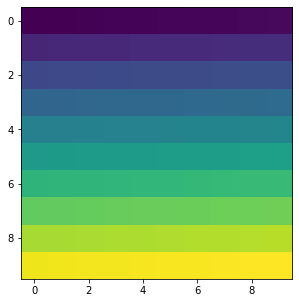

In [167]:
H = np.lib.stride_tricks.as_strided(G,(10,10),(320,8))
show(H)

Array shape: (3000, 4096, 3)


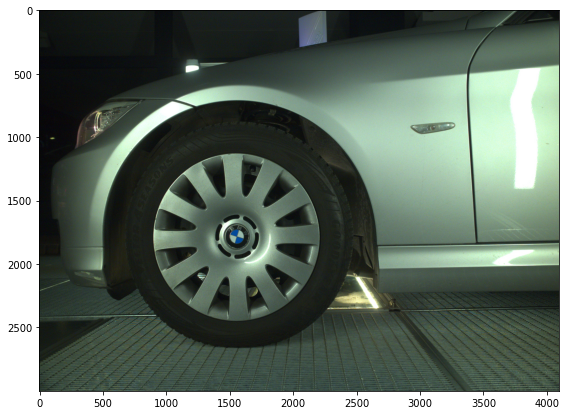

In [95]:
# Complete image
A = x[0]
show(A, size="medium")

Array shape: (300, 410, 3)


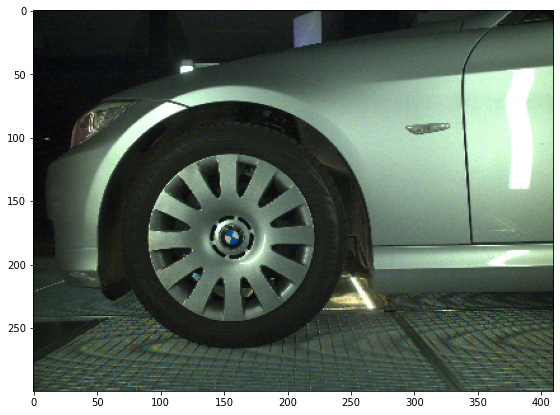

In [96]:
# Slice skipping some pixels
B = x[0][::10,::10]
show(B, size="medium")
# This is one-hundred times smaller!!!

Array shape: (300, 300, 3)


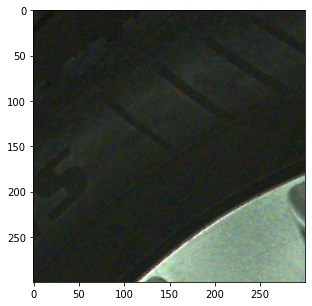

In [91]:
show(x[0][1000:1300,1000:1300])

Array shape: (500, 4096, 3)


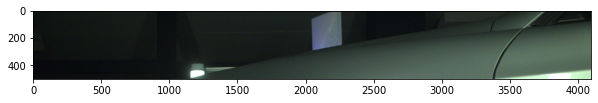

Array shape: (500, 4096, 3)


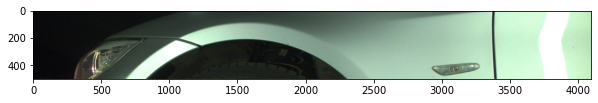

Array shape: (500, 4096, 3)


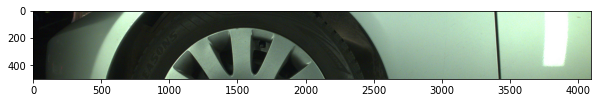

Array shape: (500, 4096, 3)


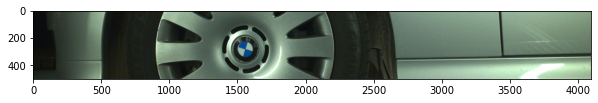

Array shape: (500, 4096, 3)


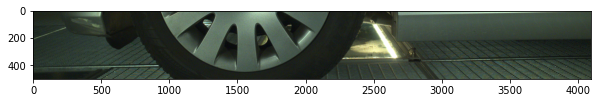

Array shape: (500, 4096, 3)


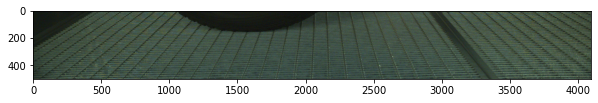

In [108]:
D = np.split(C,6)
for d in D:
    show(d)

In [512]:
3000/500

6.0

In [521]:
class Chunkifier:
    def __init__(self, param="param"):
        self.param = param
        self.array = []
        self.chunk_dims = []
        self.stride_dims = []
        self.block_coordinates = []

    def transform(self, array, chunk_w=224, chunk_h=224):
        self.array = array
        self.chunk_dims = [chunk_h, chunk_w]
        self.stride_dims = self.get_chunk_params()
        self.block_coordinates = self.generate_coordinates()
        return self.block_coordinates
        
    def get_chunk_params(self):
        height, width = self.chunk_dims[0], self.chunk_dims[1]
        # Assuming (height,width) are less than (o_height,o_width)
        o_height = self.array.shape[0]
        o_width = self.array.shape[1]
        if height > o_height or width > o_width:
            return "Parameter Val Error: Chunk (height,width) parameters must not exceed array height and width respectively"
        stridable_width, stridable_height = o_width-width, o_height-height
        # Calculate least number of chunks that can cover entire image
        squares_across, squares_down = math.ceil(o_width/width), math.ceil(o_height/height)
        stride_w = math.floor(stridable_width/(squares_across)) if squares_across > 1 else 0
        stride_h = math.floor(stridable_height/(squares_down)) if squares_down > 1 else 0
        print(f"""Chunk Views
    Squares Across:{squares_across} - Stridable Width:{stridable_width} - Stride Across:{stride_w}
    Squares Down:{squares_down} - Stridable Height:{stridable_height} - Stride Down:{stride_h}""")
        return [stridable_width, stride_w, stridable_height, stride_h, squares_across, squares_down]

    def generate_coordinates(self):
        stridable_w, stride_w, stridable_h, stride_h, blocks_a, blocks_d = self.stride_dims
        W_l = np.arange(0, stridable_w, stride_w)
        W_r = np.arange(self.chunk_dims[1], stridable_w+stride_w*2, stride_w)
        H_t = np.arange(0, stridable_h+stride_h, stride_h)
        H_b = np.arange(self.chunk_dims[0], stridable_h+stride_h*2, stride_h)
        top_left = np.array(np.meshgrid(W_l,H_t)).T
        bottom_right = np.array(np.meshgrid(W_r,H_b)).T
        print(top_left)
        blocks = blocks_a*blocks_d
        all_coordinates = np.concatenate((top_left.reshape(blocks,2),bottom_right.reshape(blocks,2)),axis=1)
        return all_coordinates

    def get_block(self, block_i):
        left = self.block_coordinates[block_i][0]
        top = self.block_coordinates[block_i][1]
        right = self.block_coordinates[block_i][2]
        bottom = self.block_coordinates[block_i][3]
        return self.array[top:bottom,left:right]
        
    def show_blocks(self):
        images = []
        for i in range(len(self.block_coordinates)):
            images.append(self.get_block(i))
        for i, image in enumerate(images):
            print(self.block_coordinates[i])
            show(image)
        return
#         rows = self.stride_dims[5]
#         cols = self.stride_dims[4]
#         axes=[]
#         fig=plt.figure()
#         for i in range(rows*cols):
#             axes.append( fig.add_subplot(rows, cols, i+1) )
#             subplot_title=("Subplot"+str(i))
#             axes[-1].set_title(subplot_title)
#             plt.imshow(self.get_block(i), interpolation='antialiased')
#         fig.tight_layout()    
#         plt.show()
        
car_chunks = Chunkifier()
coords = car_chunks.transform(A, 500, 500)
images = car_chunks.show_blocks()

Chunk Views
    Squares Across:9 - Stridable Width:3596 - Stride Across:399
    Squares Down:6 - Stridable Height:2500 - Stride Down:416
[[[   0    0]
  [   0  416]
  [   0  832]
  [   0 1248]
  [   0 1664]
  [   0 2080]
  [   0 2496]
  [   0 2912]]

 [[ 399    0]
  [ 399  416]
  [ 399  832]
  [ 399 1248]
  [ 399 1664]
  [ 399 2080]
  [ 399 2496]
  [ 399 2912]]

 [[ 798    0]
  [ 798  416]
  [ 798  832]
  [ 798 1248]
  [ 798 1664]
  [ 798 2080]
  [ 798 2496]
  [ 798 2912]]

 [[1197    0]
  [1197  416]
  [1197  832]
  [1197 1248]
  [1197 1664]
  [1197 2080]
  [1197 2496]
  [1197 2912]]

 [[1596    0]
  [1596  416]
  [1596  832]
  [1596 1248]
  [1596 1664]
  [1596 2080]
  [1596 2496]
  [1596 2912]]

 [[1995    0]
  [1995  416]
  [1995  832]
  [1995 1248]
  [1995 1664]
  [1995 2080]
  [1995 2496]
  [1995 2912]]

 [[2394    0]
  [2394  416]
  [2394  832]
  [2394 1248]
  [2394 1664]
  [2394 2080]
  [2394 2496]
  [2394 2912]]

 [[2793    0]
  [2793  416]
  [2793  832]
  [2793 1248]
  [2793 1

ValueError: cannot reshape array of size 160 into shape (54,2)

Array shape: (3000, 4096, 3)


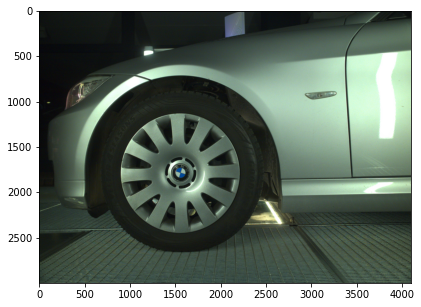

In [440]:
show(A)